#### Global Youtube Statistics Data

Dataset acquired from Kaggle

<!-- https://www.kaggle.com/datasets/naniruddhan/global-youtube-statistics-data -->

#### Import Packages

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

#### Load dataset

In [45]:
import kagglehub
url = kagglehub.dataset_download("naniruddhan/global-youtube-statistics-data")
urlpath = '\Global YouTube Statistics.csv'

In [46]:
file = f'{url}{urlpath}'
encoding = 'latin1'
# print(f'{file}, encoding={encoding}')
print(file)

C:\Users\wareh\.cache\kagglehub\datasets\naniruddhan\global-youtube-statistics-data\versions\1\Global YouTube Statistics.csv


In [47]:
df = pd.read_csv(r'C:\Users\wareh\.cache\kagglehub\datasets\naniruddhan\global-youtube-statistics-data\versions\1\Global YouTube Statistics.csv', encoding=encoding)

In [48]:
pd.set_option('display.max_column', None)

#### Workspace (clean & preprocess)

In [60]:
display(df.info(), df[:2])

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 994
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   rank                      995 non-null    int64 
 1   Youtuber                  995 non-null    object
 2   subscribers               995 non-null    int64 
 3   video views               995 non-null    int64 
 4   category                  995 non-null    object
 5   Title                     995 non-null    object
 6   uploads                   995 non-null    int64 
 7   Country                   995 non-null    object
 8   channel_type              995 non-null    object
 9   video_views_rank          995 non-null    int64 
 10  country_rank              995 non-null    int64 
 11  channel_type_rank         995 non-null    int64 
 12  video_views_(30_days)     995 non-null    int64 
 13  lowest_monthly_earnings   995 non-null    int64 
 14  highest_monthly_earnings  995 n

None

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_(30_days),lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_(30_days),created_year,Population,Urban_population
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,Music,1,1,1,2258000000,564600,9000000,6800000,108400000,2000000,2006,1366417754,471031528
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,Games,4055159,7670,7423,12,0,0,0,0,100000,2006,328239523,270663028


In [50]:
# drop unwanted column
col_todrop = ['Latitude','Longitude','Abbreviation',
              'Gross tertiary education enrollment (%)',
              'Country of origin', 'created_month', 'created_date',
              'Unemployment rate']
df.drop(col_todrop, axis=1, inplace=True)


In [51]:
# rename long named columns
df.rename(columns={'video_views_for_the_last_30_days':'video_views_(30_days)','subscribers_for_last_30_days':'subscribers_(30_days)'}, inplace=True)

In [52]:
df['Country'] = df['Country'].str.title()

In [53]:
numeric_col = df.select_dtypes(include=[np.number]).columns.tolist()
object_col = df.select_dtypes(include=['category', 'object']).columns.tolist()

In [54]:
# check for negative value
df[numeric_col][df[numeric_col]<0].sum()

rank                        0.0
subscribers                 0.0
video views                 0.0
uploads                     0.0
video_views_rank            0.0
country_rank                0.0
channel_type_rank           0.0
video_views_(30_days)       0.0
lowest_monthly_earnings     0.0
highest_monthly_earnings    0.0
lowest_yearly_earnings      0.0
highest_yearly_earnings     0.0
subscribers_(30_days)       0.0
created_year                0.0
Population                  0.0
Urban_population            0.0
dtype: float64

In [55]:
# check for null value
df.isnull().sum()[df.isnull().sum()>0]

subscribers                3
category                  55
Country                  125
channel_type              32
video_views_rank           1
country_rank             119
channel_type_rank         35
video_views_(30_days)     57
subscribers_(30_days)    340
created_year               5
Population               126
Urban_population         126
dtype: int64

In [56]:
df[object_col] = df[object_col].fillna('None')

In [57]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

for col in numeric_col:
  if not df[col].mode().empty:
    mode_value = df[col].mode()[0].astype('int64')
  else:
    mode_value = df[col].mean().astype('int64')
  df[col] = df[col].fillna(mode_value)
  df[col] = pd.to_numeric(df[col], errors='coerce').astype('int64')

In [58]:
# drop duplicates
df = df.drop_duplicates()

#### EDA

In [166]:
display(df.info(),df[:3])

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 994
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rank                      995 non-null    int64  
 1   Youtuber                  995 non-null    object 
 2   subscribers               995 non-null    int64  
 3   video views               995 non-null    int64  
 4   category                  995 non-null    object 
 5   Title                     995 non-null    object 
 6   uploads                   995 non-null    int64  
 7   Country                   995 non-null    object 
 8   channel_type              995 non-null    object 
 9   video_views_rank          995 non-null    int64  
 10  country_rank              995 non-null    int64  
 11  channel_type_rank         995 non-null    int64  
 12  video_views_(30_days)     995 non-null    int64  
 13  lowest_monthly_earnings   995 non-null    int64  
 14  highest_monthly

None

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_(30_days),lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_(30_days),created_year,Population,Urban_population,video_upload_percent
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,Music,1,1,1,2258000000,564600,9000000,6800000,108400000,2000000,2006,1366417754,471031528,0.000009
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,Games,4055159,7670,7423,12,0,0,0,0,100000,2006,328239523,270663028,inf
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,Entertainment,48,1,1,1348000000,337000,5400000,4000000,64700000,8000000,2012,328239523,270663028,0.000003


In [219]:
# Groupby
a = 'created_year'
b = 'Youtuber'
f = 'subscribers'
g = 'video views'
dfG_YAll = df.groupby(a).value_counts().reset_index().sort_values(by='subscribers', ascending=False)  [:-1]
dfG_YSV = df.groupby(b)[[f,g]].sum().reset_index().sort_values(by=[f,g],ascending=False) [:10]

In [193]:
relation = [
            'lowest_yearly_earnings',
            'highest_yearly_earnings',
            'lowest_monthly_earnings',
            'highest_monthly_earnings']

dfG_SVLH = df.groupby('channel_type')[relation].sum().reset_index().sort_values(by=relation,ascending=False) [:10]

In [172]:
df.groupby('channel_type')[['subscribers','video views']].sum().reset_index().sort_values(by=['subscribers','video views'],ascending=False) [:10]

,channel_type,subscribers,video views
4,Entertainment,6922700000,3371893086218
8,Music,5771500000,3252736453212
6,Games,2111700000,726607151373
12,People,1953300000,885919109792
3,Education,1300200000,764805933171
2,Comedy,1063700000,453140574157
5,Film,964400000,459242749807
10,None,658700000,247954641213
7,Howto,649100000,195650627890
9,News,611700000,311352817910


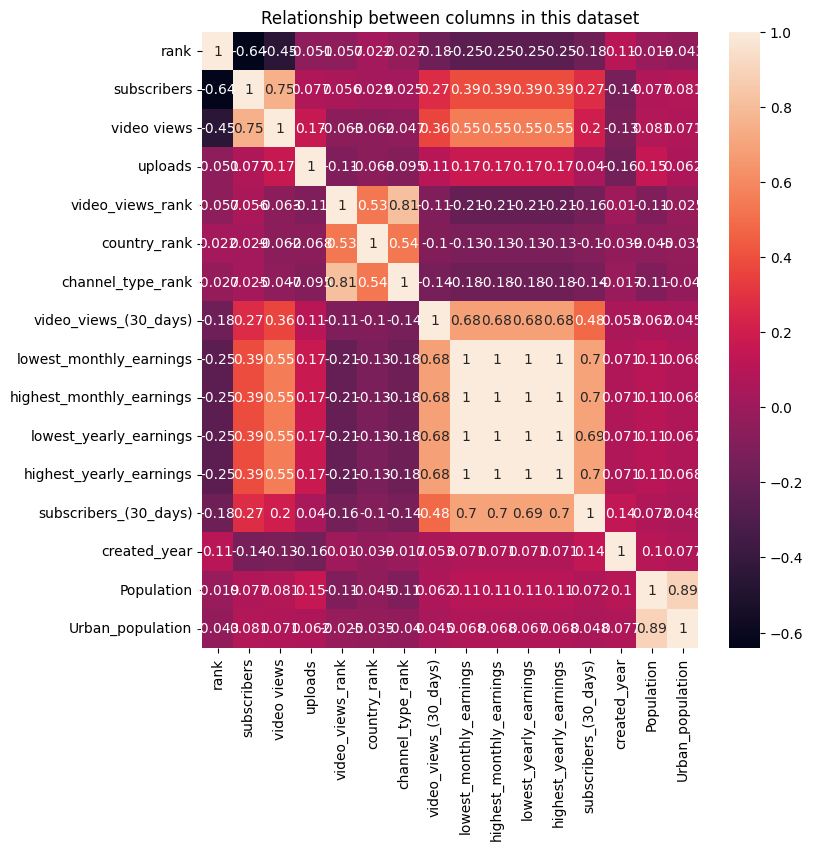

In [233]:
# Heatmap
plt.figure(figsize=(8,8))
sns.heatmap(data=df[numeric_col].corr(),annot=True )
plt.title('Relationship between columns in this dataset')
plt.show()

In [ ]:
# Find correlation other than 1
dfnumeric_corr = df[numeric_col].corr(method='pearson').unstack().sort_values(kind='stable', ascending=False)
dfnumeric_corr[((dfnumeric_corr)>=0.75) & ((dfnumeric_corr)<1) ]

lowest_monthly_earnings   highest_yearly_earnings     0.999998
highest_yearly_earnings   lowest_monthly_earnings     0.999998
lowest_monthly_earnings   highest_monthly_earnings    0.999955
highest_monthly_earnings  lowest_monthly_earnings     0.999955
                          highest_yearly_earnings     0.999953
highest_yearly_earnings   highest_monthly_earnings    0.999953
lowest_monthly_earnings   lowest_yearly_earnings      0.999942
lowest_yearly_earnings    lowest_monthly_earnings     0.999942
                          highest_yearly_earnings     0.999941
highest_yearly_earnings   lowest_yearly_earnings      0.999941
highest_monthly_earnings  lowest_yearly_earnings      0.999884
lowest_yearly_earnings    highest_monthly_earnings    0.999884
Population                Urban_population            0.893845
Urban_population          Population                  0.893845
video_views_rank          channel_type_rank           0.809069
channel_type_rank         video_views_rank            0

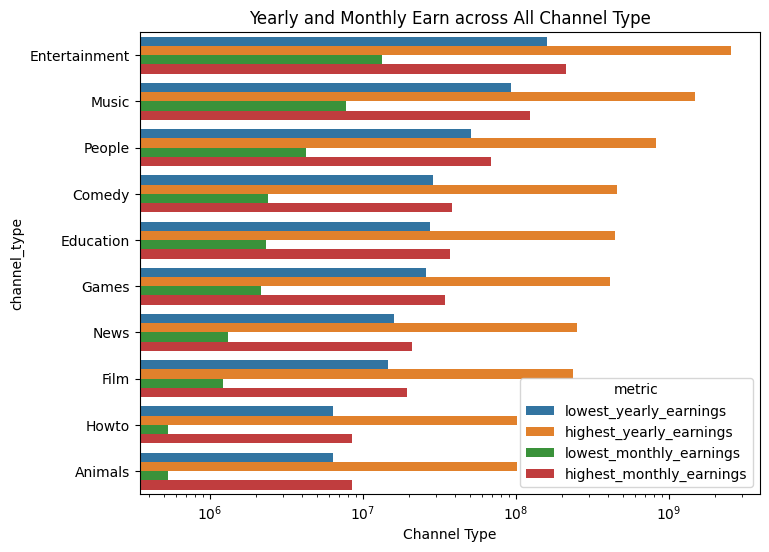

In [ ]:
# 1. Grouped Barplot
plt.figure(figsize=(8,6))
df_melted = dfG_SVLH.melt(id_vars='channel_type', var_name='metric', value_name='value')
sns.barplot(data=df_melted, x='value', y='channel_type', hue='metric')
plt.title('Yearly and Monthly Earn across All Channel Type')
plt.xlabel('Year and Month Earnings')
plt.xlabel('Channel Type')
plt.xscale('log')
plt.show()

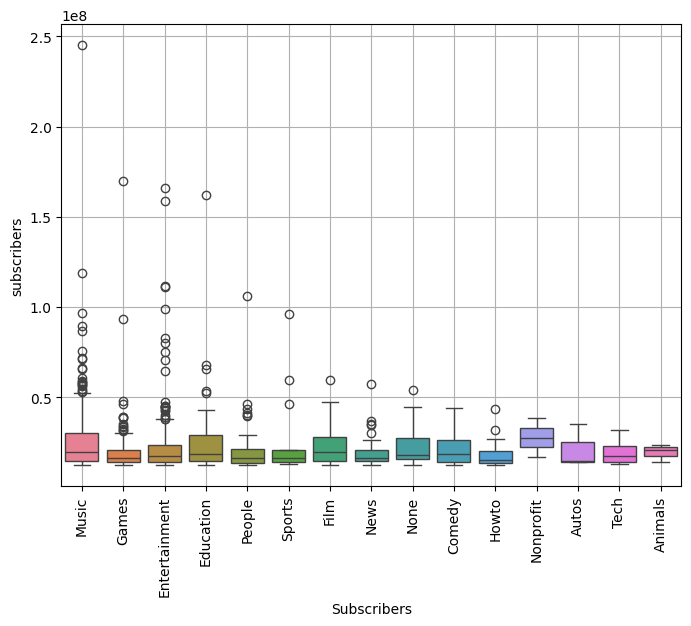

In [235]:
# 2. Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df.sort_values(by='subscribers', ascending=False),
            x='channel_type', y='subscribers', hue='channel_type')
plt.xticks(rotation=90)
plt.xlabel('Channel Type')
plt.xlabel('Subscribers')
plt.grid()
plt.show()

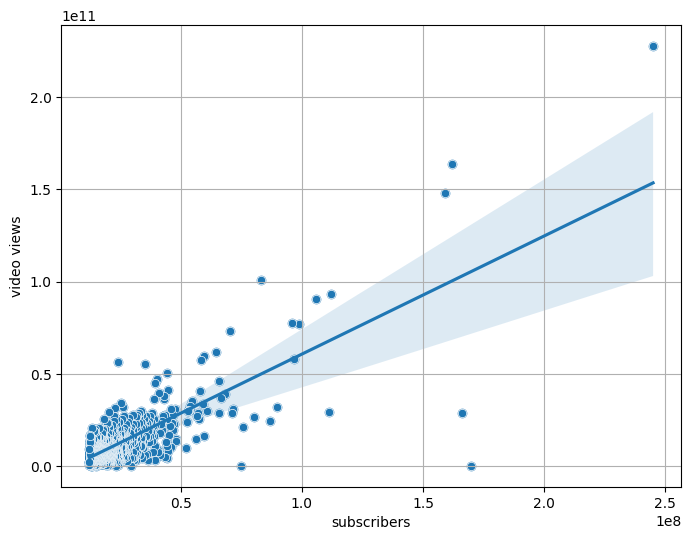

In [236]:
# 3. Scatterplot
plt.figure(figsize=(8,6))
sns.regplot(data=dfG_YAll, x='subscribers', y='video views')
sns.scatterplot(data=dfG_YAll, x='subscribers', y='video views', palette='bright')
plt.grid()
plt.show()

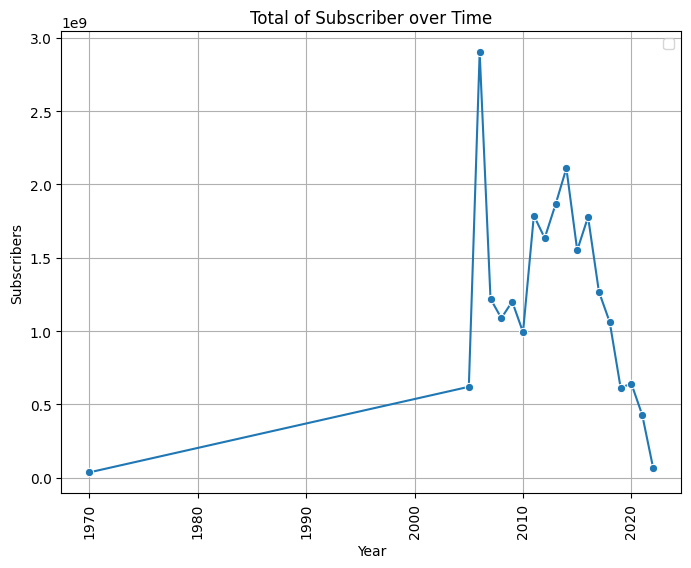

In [237]:
# 4. Lineplot
plt.figure(figsize=(8,6))
sns.lineplot(data=df.groupby('created_year')['subscribers'].sum().reset_index(),
             x='created_year', y='subscribers',
             marker='o', palette='bright')
plt.title('Total of Subscriber over Time')
plt.xlabel('Year')
plt.ylabel('Subscribers')
plt.grid()
plt.legend()
plt.xticks(rotation=90)
plt.show()

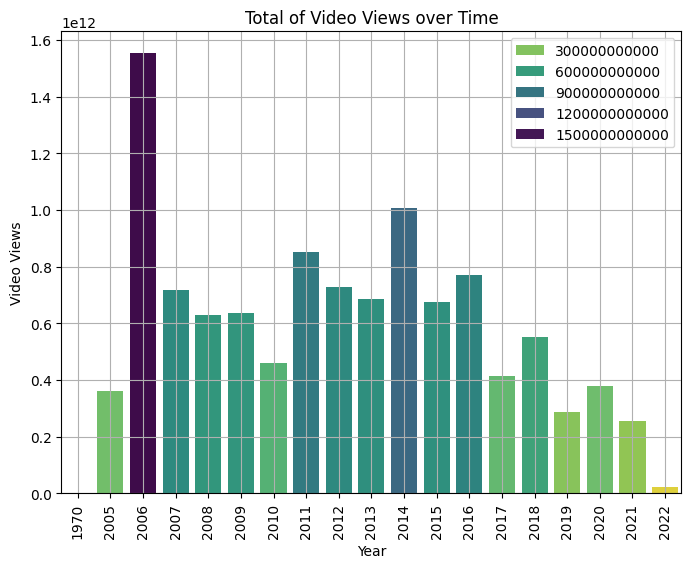

In [238]:
# 5. Barplot
plt.figure(figsize=(8,6))
sns.barplot(data=df.groupby('created_year')['video views'].sum().reset_index(),
             x='created_year', y='video views',
             hue='video views', palette='viridis_r')
plt.title('Total of Video Views over Time')
plt.xlabel('Year')
plt.ylabel('Video Views')
plt.grid()
plt.legend()
plt.xticks(rotation=90)
plt.show()

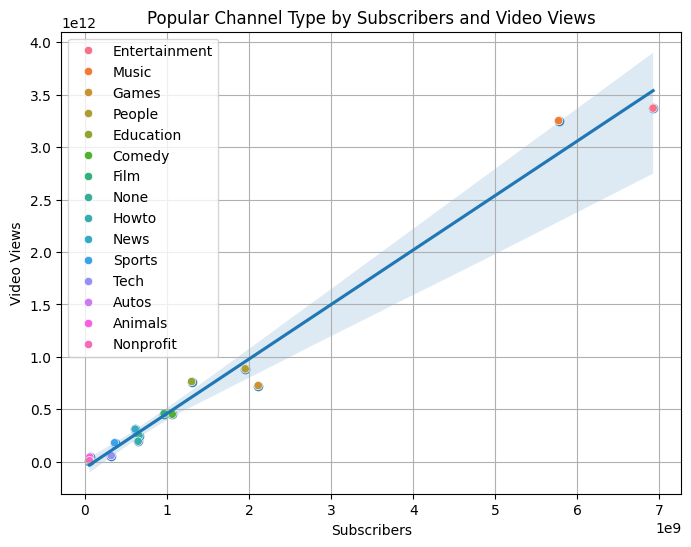

In [ ]:
# 6. Regplot and Scatterplot
plt.figure(figsize=(8,6))
sns.regplot(data=df.groupby('channel_type')[['subscribers', 'video views']].sum().reset_index().sort_values(by='subscribers',ascending=False),
             x='subscribers', y='video views')
sns.scatterplot(data=df.groupby('channel_type')[['subscribers', 'video views']].sum().reset_index().sort_values(by='subscribers',ascending=False),
             x='subscribers', y='video views', hue='channel_type')
plt.title('Popular Channel Type by Subscribers and Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.legend()
plt.grid()
plt.show()

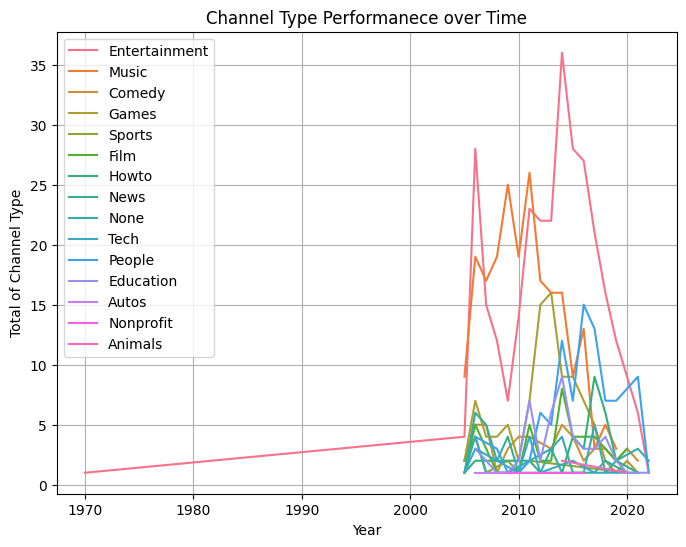

In [239]:
# 7. Lineplot
plt.figure(figsize=(8,6))
sns.lineplot(data=df.groupby('created_year')['channel_type'].value_counts().reset_index(),
             x='created_year', y='count', hue='channel_type')
plt.title('Channel Type Performanece over Time')
plt.xlabel('Year')
plt.ylabel('Total of Channel Type')
plt.legend()
plt.grid()
plt.show()

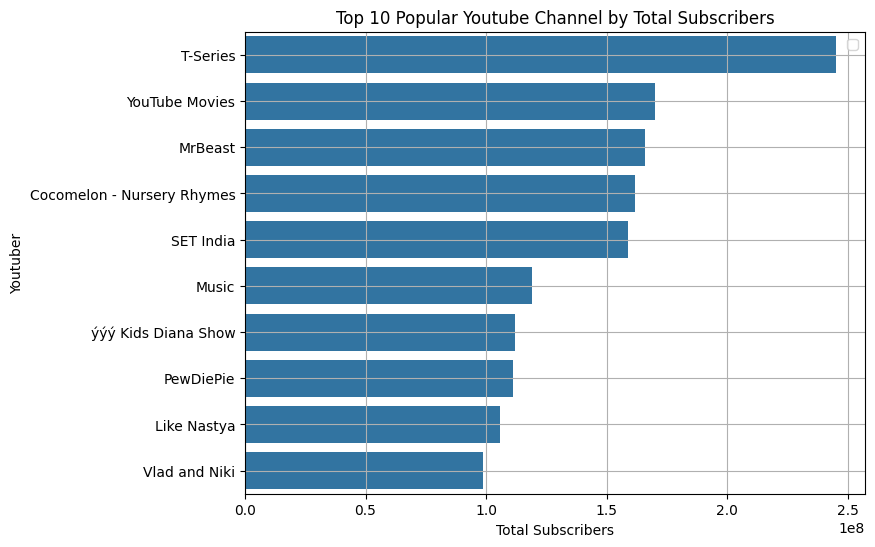

In [ ]:
# 8. Barplot
plt.figure(figsize=(8,6))
sns.barplot(data=dfG_YSV[:10], x='subscribers', y='Youtuber')
plt.title('Top 10 Popular Youtube Channel by Total Subscribers')
plt.xlabel('Total Subscribers')
plt.ylabel('Youtuber')
plt.legend()
plt.grid()
plt.show()

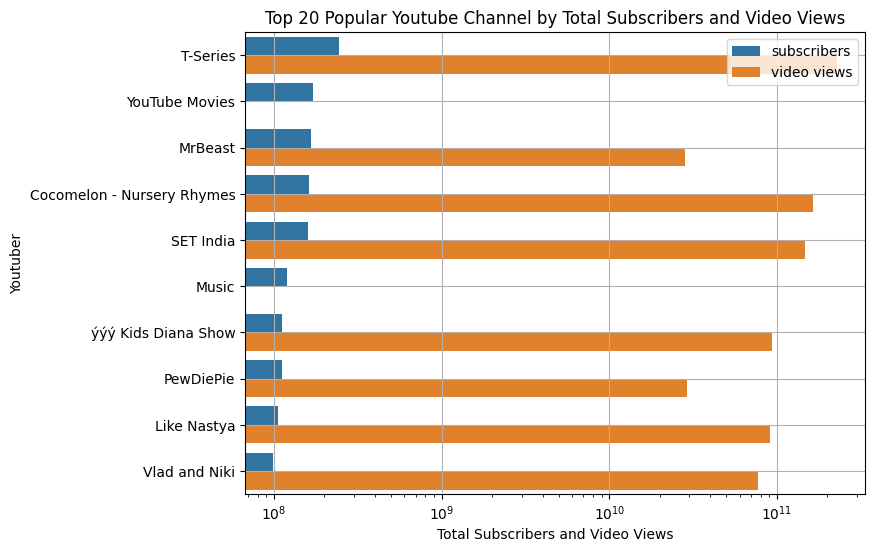

In [ ]:
# 9. Barplot
plt.figure(figsize=(8,6))
dfG_YSV_melt = dfG_YSV.melt(id_vars='Youtuber', var_name='metric', value_name='value')
sns.barplot(data=dfG_YSV_melt, x='value', y='Youtuber', hue='metric')
plt.title('Top 20 Popular Youtube Channel by Total Subscribers and Video Views')
plt.xscale('log')
plt.xlabel('Total Subscribers and Video Views')
plt.ylabel('Youtuber')
plt.legend()
plt.grid()
plt.show()

#### Recommender System
Need to fine tune

In [240]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

In [ ]:
# Create random user id for youtuber
np.random.seed(0)
df['user_id'] = np.random.randint(1,201,size=len(df))

In [ ]:
# Make copies of dataframe
copy_df = df[['user_id', 'Youtuber', 'video views']].copy()
copy_df.columns = ['user_id', 'youtube_id', 'views_frequency']

In [243]:
user_ch_matrix = copy_df.pivot_table(index='user_id', columns='youtube_id', values='views_frequency').fillna(0)
sparse_user_ch_matrix = csr_matrix(user_ch_matrix)

In [244]:
channel_similarity = cosine_similarity(sparse_user_ch_matrix.T)
channel_similarity_df = pd.DataFrame(channel_similarity, index=user_ch_matrix.columns, columns=user_ch_matrix.columns)

In [ ]:
def get_recommendations_for_user(user_id, user_channel_matrix, similarity_df, top_n=5):
    user_data = user_channel_matrix.loc[user_id]
    watched_channels = user_data[user_data > 0].index.tolist()
    scores = pd.Series(dtype=float)

    for channel in watched_channels:
        similarity_scores = similarity_df[channel] * user_data[channel]
        scores = scores.add(similarity_scores, fill_value=0)
    scores = scores.drop(watched_channels, errors='ignore')
    recommended_channels = scores.sort_values(ascending=False).head(top_n).index.tolist()

    return recommended_channels

In [250]:
# Change this ID to test different users
user_id = 4
recommended_channels = get_recommendations_for_user(user_id, user_ch_matrix, channel_similarity_df, top_n=5)
print(f"Recommended channels for user {user_id}:")
for channel in recommended_channels:
  print(f"- {channel}")

Recommended channels for user 4:
- #Refugio Mental
- Right to Shiksha
- RihannaVEVO
- RobTopGames
- Robin Hood Gamer


In [644]:
# Example: Get recommendations for different users
user_id_1 = 3  # Example user
user_id_2 = 90  # Another example user

# Test for different users
recommendations_user_1 = get_recommendations_for_user(user_id_1, user_ch_matrix, channel_similarity_df, top_n=5)
recommendations_user_2 = get_recommendations_for_user(user_id_2, user_ch_matrix, channel_similarity_df, top_n=5)

print(f"Recommendations for user {user_id_1}: {recommendations_user_1}")
print(f"Recommendations for user {user_id_2}: {recommendations_user_2}")


Recommendations for user 3: ['#Refugio Mental', 'Right to Shiksha', 'RihannaVEVO', 'RobTopGames', 'Robin Hood Gamer']
Recommendations for user 90: ['#Refugio Mental', 'Ricis Official', 'Rihanna', 'RihannaVEVO', 'RobTopGames']
